In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
import imageai
from imageai.Detection.Custom import CustomObjectDetection
from keras.models import model_from_json
from keras.models import load_model
from skimage.segmentation import mark_boundaries
from imageai.Detection import ObjectDetection

In [13]:
## bounding boxes plotting 
def retinaBBox(imagePath):
    bbox = retinanet.detectObjectsFromImage(input_image=imagePath, output_image_path="random.jpg")
    bboxList = []
    for box in bbox:
        bboxList.append(box["box_points"])
    
    return bboxList  ### return list of bounding boxes

In [11]:
## retina-net model load
retinanet  = ObjectDetection()
retinanet.setModelTypeAsRetinaNet()
retinanet.setModelPath("retinanet-cocoa-data.h5")
retinanet.loadModel()
customClasses = retinanet.CustomObjects(boat=True)

tracking <tf.Variable 'Variable_10:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_11:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_12:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_13:0' shape=(9, 4) dtype=float32> anchors
tracking <tf.Variable 'Variable_14:0' shape=(9, 4) dtype=float32> anchors


[]
[]
[[255, 112, 599, 673]]
[]
[]
[]
[]
[]
[[284, 3, 770, 659]]
[]


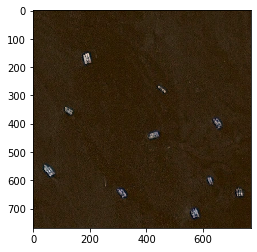

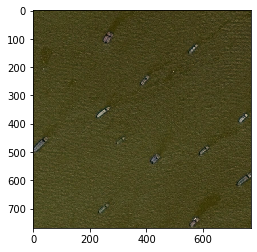

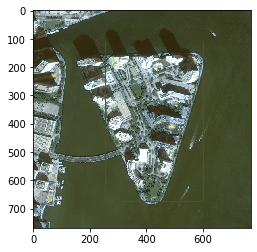

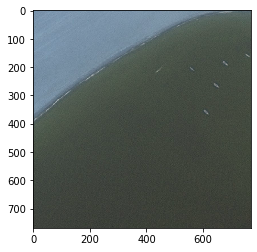

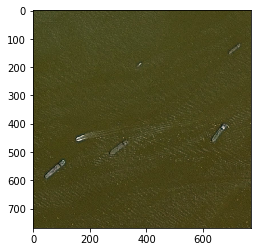

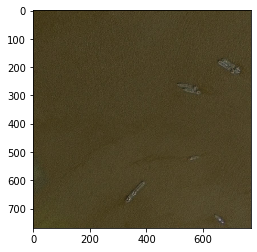

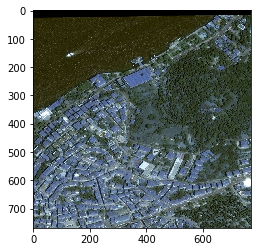

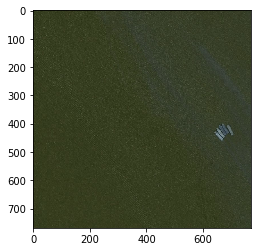

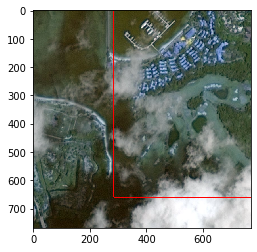

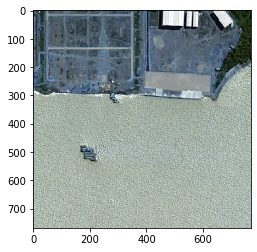

In [21]:
## testing retina net model on images
imagesPath = "../code/ships_small_dataset/test/"

for dir,_, files in os.walk(imagesPath):
    for file in files[10:20]:
        imagePath = imagesPath + file ## "8ba136c38.jpg"
        image = cv2.imread(imagePath)
        yoloBboxList = retinaBBox(imagePath)
        print(yoloBboxList)
        for bbox in yoloBboxList:
            image = cv2.rectangle(image, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 0, 0), 2)
        plt.figure()
        plt.imshow(image)
